# **LetsGrowMore**
**Task - 3- Intermediate Level Task**

**Prediction using Decision Tree Algorithm**

**ASHIK KUMAR**

# **Importing libraries**

In [104]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Dataset**

In [106]:
# loading the data
data=pd.read_csv('/content/drive/MyDrive/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
# dimensions of the dataset
data.shape

(150, 6)

In [108]:
# Finding the missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [109]:
# Exploring the dataset
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


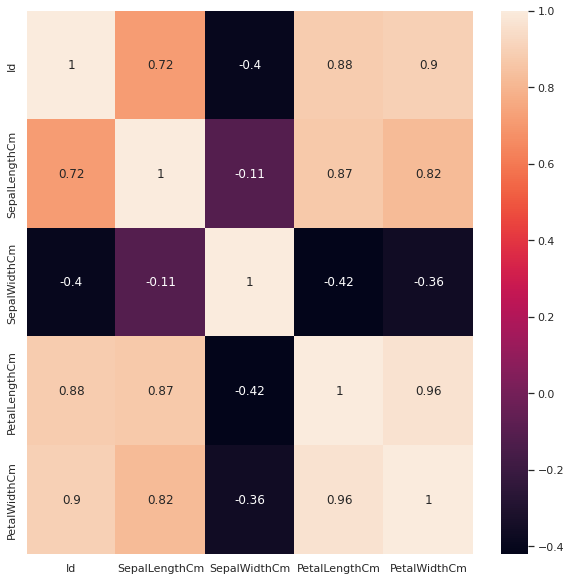

In [110]:
#corr() is used to find the pairwise correlation of all columns in the dataframe.
plt.figure(figsize=(10,10))
fig=sns.heatmap(data.corr(),annot=True)
plt.show()

**Label Encoding**

In [111]:
# Importing the library for label encoding
from sklearn.preprocessing import LabelEncoder

# Import label encoder
from sklearn import preprocessing

In [112]:
# Creating the instance of the class LabelEncoder and fitting the column that needs to be changed to labels
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['Species']= label_encoder.fit_transform(data['Species'])
 
data['Species'].unique()

array([0, 1, 2])

# **MODEL BUILDING**

In [113]:
from sklearn.model_selection import train_test_split,cross_val_score
# Declaring the dependent and independent variables
X=data.drop('Species',axis=1)
y=data['Species']
# Splitting the data into 80% training data and 20% test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=62)
xtrain.shape,xtest.shape

((120, 5), (30, 5))

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

**Decision Tree**

In [115]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [116]:
# Creating the instance of the class DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=10)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=10)

In [117]:
# Printing the accuracy score for test and train dataset
print("Accuracy of train data is",dt_model.score(xtrain,ytrain))
print("Accuracy of test data is",dt_model.score(xtest,ytest))

Accuracy of train data is 1.0
Accuracy of test data is 0.9666666666666667


In [118]:
# creating an array of train and test accuracy using different depths
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(xtrain, ytrain)
    train_accuracy.append(dt_model.score(xtrain, ytrain))
    validation_accuracy.append(dt_model.score(xtest, ytest))

In [119]:
# creating the dataframe for printing the train and test accuracies for each iteration
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.683333,0.566667
1,2,1.000000,0.966667
2,3,1.000000,0.966667
3,4,1.000000,0.966667
4,5,1.000000,0.966667


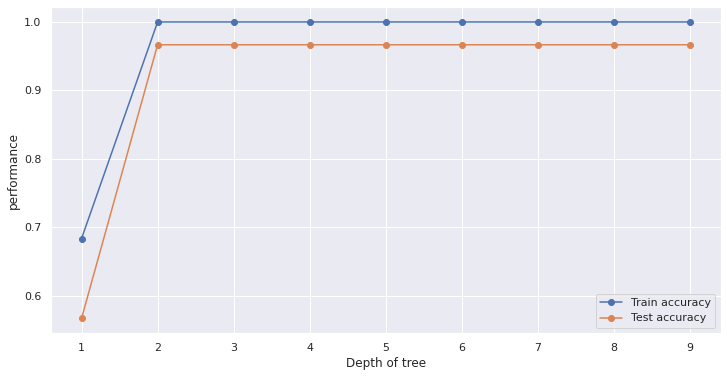

In [120]:
# Creating a plot for comparing the accuracies
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o',label='Train accuracy')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o',label='Test accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()
plt.show()

In [121]:
# As seen from the graph the optimum depths is 3 for maximum accuracy
dt_model = DecisionTreeClassifier(max_depth=3, random_state=10)

In [122]:
#fitting the model and printing the training score
dt_model.fit(xtrain, ytrain)
print(dt_model.score(xtrain, ytrain))

1.0


In [123]:
#printing the test score
y_pred=dt_model.predict(xtest)
#Test score
print(dt_model.score(xtest, ytest))

0.9666666666666667


In [124]:
# Importing the library for drawing the tree
from sklearn import tree

In [125]:
#DOT extension are template files created by Microsoft Word 
#to have pre-formatted settings for generation of further DOC files.
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X.columns,max_depth=3,filled=True)

In [126]:
!dot -Tpng tree.dot -o tree.png

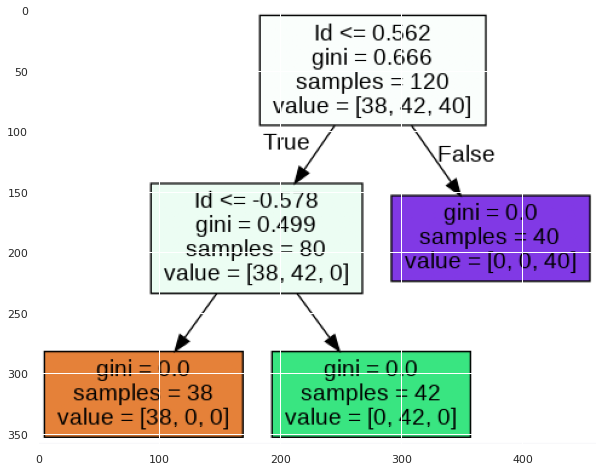

In [127]:
# Loading the .png image which a final decision tree made from the model
image = plt.imread('tree.png')
plt.figure(figsize=(10,10))
plt.imshow(image)

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



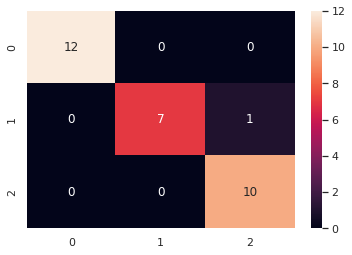

In [128]:
# importing the library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Confusion matrix 
cm= confusion_matrix(ytest, y_pred)
print(cm)
# Using the heatmap for printing the confusion matrix for a nicer way
sns.heatmap(cm, annot=True)
print(accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

In [129]:
#THANK YOU